In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
import warnings
warnings.filterwarnings('ignore')

In [2]:
def NSE(y_pred, y_true):
    y_mean = np.mean(y_true)
    a = np.sum(np.square(y_true[:16] - y_pred[:16]))
    b = np.sum(np.square(y_true[:16] - y_mean))
    c = np.sum(np.square(y_true[16:] - y_pred[16:]))
    d = np.sum(np.square(y_true[16:] - y_mean))
    return 100 * (1 - 0.65 * a / b - 0.35 * c / d)

In [3]:
train_test1 = pd.read_csv('../input/train_test1.csv')
train_test2 = pd.read_csv('../input/train_test2.csv')
train_test3 = pd.read_csv('../input/train_test3.csv')

In [4]:
train_test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304 entries, 0 to 303
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   TimeStample  304 non-null    object 
 1   Qi           248 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.9+ KB


In [5]:
train1 = train_test1.loc[train_test1['Qi'].notnull(), :]
# test1 = train_test1.loc[train_test1['Qi'].isnull(), :]
y_train1 = train1['Qi'].values

train2 = train_test2.loc[train_test2['Qi'].notnull(), :]
# test2 = train_test2.loc[train_test2['Qi'].isnull(), :]
y_train2 = train2['Qi'].values

train3 = train_test3.loc[train_test3['Qi'].notnull(), :]
# test3 = train_test3.loc[train_test3['Qi'].isnull(), :]
y_train3 = train3['Qi'].values

In [6]:
data = [train1, train2, train3]
for i in data:
    i.sort_values(by='TimeStample', inplace=True)
    i['ds'] = pd.to_datetime(i['TimeStample'])
    i['y'] = i['Qi']
    i['y'] = np.log(i['y'])
    i.drop(['TimeStample', 'Qi'], axis=1, inplace=True)

In [7]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 247
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      248 non-null    datetime64[ns]
 1   y       248 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


In [8]:
m1 = Prophet()
m1.fit(train1)

m2 = Prophet()
m2.fit(train2)

m3 = Prophet()
m3.fit(train3)


future1 = m1.make_future_dataframe(periods=56, freq='3H')
future2 = m2.make_future_dataframe(periods=56, freq='3H')
future3 = m3.make_future_dataframe(periods=56, freq='3H')

print(future1.head().append(future1.tail()))
print(future2.head().append(future2.tail()))
print(future3.head().append(future3.tail()))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


                     ds
0   2018-01-01 02:00:00
1   2018-01-01 05:00:00
2   2018-01-01 08:00:00
3   2018-01-01 11:00:00
4   2018-01-01 14:00:00
299 2018-02-07 11:00:00
300 2018-02-07 14:00:00
301 2018-02-07 17:00:00
302 2018-02-07 20:00:00
303 2018-02-07 23:00:00
                     ds
0   2018-07-01 02:00:00
1   2018-07-01 05:00:00
2   2018-07-01 08:00:00
3   2018-07-01 11:00:00
4   2018-07-01 14:00:00
299 2018-08-07 11:00:00
300 2018-08-07 14:00:00
301 2018-08-07 17:00:00
302 2018-08-07 20:00:00
303 2018-08-07 23:00:00
                     ds
0   2018-10-01 02:00:00
1   2018-10-01 05:00:00
2   2018-10-01 08:00:00
3   2018-10-01 11:00:00
4   2018-10-01 14:00:00
299 2018-11-07 11:00:00
300 2018-11-07 14:00:00
301 2018-11-07 17:00:00
302 2018-11-07 20:00:00
303 2018-11-07 23:00:00


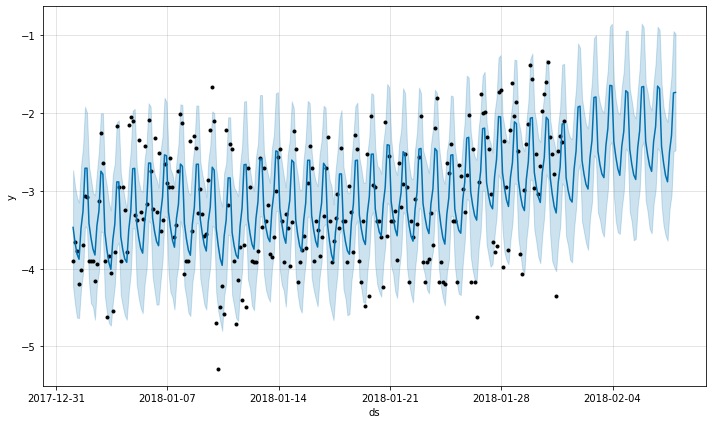

In [9]:
pred1 = m1.predict(future1)
m1.plot(pred1);

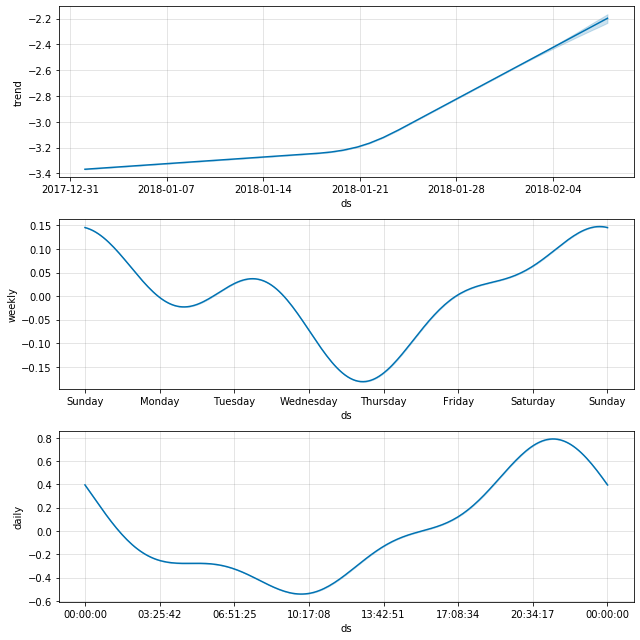

In [10]:
m1.plot_components(pred1);

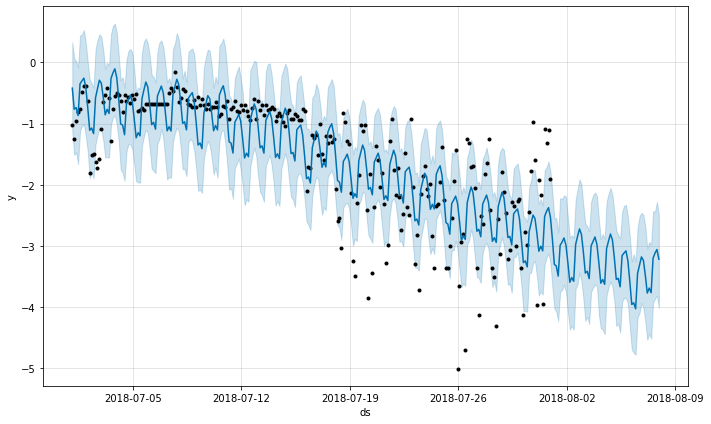

In [11]:
pred2 = m2.predict(future2)
m2.plot(pred2);

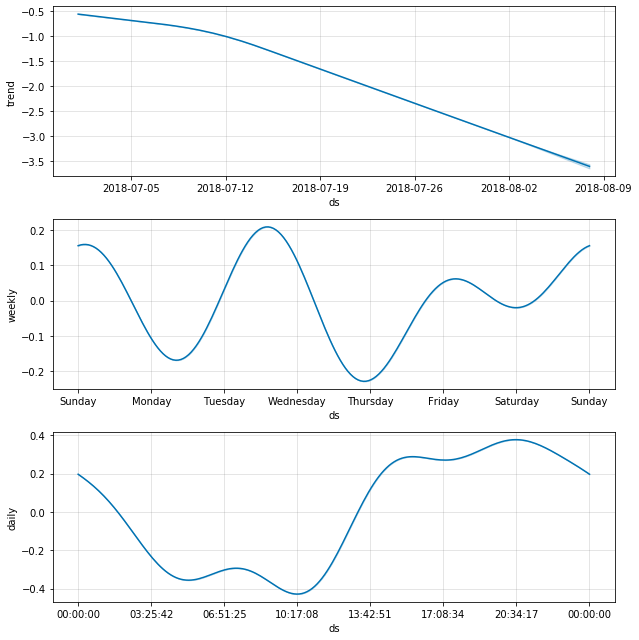

In [12]:
m2.plot_components(pred2);

In [ ]:
pred3 = m3.predict(future3)
m3.plot(pred3);

In [ ]:
m3.plot_components(pred3);

In [ ]:
train_pred1 = np.exp(pred1.iloc[:-56, :]['yhat'].values)
train_pred2 = np.exp(pred2.iloc[:-56, :]['yhat'].values)
train_pred3 = np.exp(pred3.iloc[:-56, :]['yhat'].values)

test_pred1 = np.exp(pred1.iloc[-56:, :]['yhat'].values)
test_pred2 = np.exp(pred2.iloc[-56:, :]['yhat'].values)
test_pred3 = np.exp(pred3.iloc[-56:, :]['yhat'].values)

In [ ]:
NSE(y_train1, train_pred1), NSE(y_train2, train_pred2), NSE(y_train3, train_pred3)

In [ ]:
cols = ['Prediction{}'.format(i) for i in range(1, 57)]

sub1 = pd.DataFrame(test_pred1).T
sub1.columns = cols
sub1['SeqNum'] = 1
sub1 = sub1[['SeqNum'] + cols]

sub2 = pd.DataFrame(test_pred2).T
sub2.columns = cols
sub2['SeqNum'] = 2
sub2 = sub1[['SeqNum'] + cols]

sub3 = pd.DataFrame(test_pred3).T
sub3.columns = cols
sub3['SeqNum'] = 3
sub3 = sub1[['SeqNum'] + cols]

sub = pd.concat([sub1, sub2, sub3])
sub.to_csv('../sub/sub_prophet.csv', index=False)